<a href="https://colab.research.google.com/github/nikhiii0316/GUVI_D15_Final-Project/blob/main/Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#  **Chennai House Price Prediction**
### **Problem Statement**





**Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?**

# Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing the required CSV data file**



In [3]:
pd.set_option('display.max_columns', None) #used for expanding the no.of columns in a dataframe
df=pd.read_csv("/content/train-chennai-sale.csv") #importing the data
df.head() #to view the firts 5 datas in the data set


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# Observing the dataset

In [4]:
df.info() #prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [5]:
df.describe() #returns description of the data in the DataFrame

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [6]:
df.isnull().sum() #returns the number of missing values in the data set.

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

## N_BEDROOM

In [7]:
print(df.loc[df['N_BEDROOM'].isnull(),'INT_SQFT'])
print('\n finding the average area of different bhk')
print(df[['N_BEDROOM','INT_SQFT']].groupby('N_BEDROOM').mean())
df['N_BEDROOM'].fillna(2,inplace=True) #in null bedroom values filling with 2bhk

4060    1556
Name: INT_SQFT, dtype: int64

 finding the average area of different bhk
              INT_SQFT
N_BEDROOM             
1.0        1078.015283
2.0        1596.548044
3.0        1947.609618
4.0        2364.141732


# N_BATHROOM

In [8]:
df[df['N_BATHROOM'].isnull()]
print(df[['N_BEDROOM','N_BATHROOM']].groupby('N_BEDROOM').mean())
print(df.loc[df['N_BEDROOM']==1,'N_BATHROOM'].isnull().sum())
df['N_BATHROOM'].fillna(1,inplace=True) #in null bathroom values filling with 1 as most null values are 1bhk

           N_BATHROOM
N_BEDROOM            
1.0          1.000000
2.0          1.235544
3.0          2.000000
4.0          2.000000
4


# QS_OVERALL

In [9]:
df[df['QS_OVERALL'].isnull()]
print(df[['N_BEDROOM','QS_OVERALL']].groupby('N_BEDROOM').mean())
df['QS_OVERALL'].fillna(3.5,inplace=True) #since for all bhk is close to 3.5 we fill with 3.5

           QS_OVERALL
N_BEDROOM            
1.0          3.495865
2.0          3.512220
3.0          3.502646
4.0          3.532688


In [10]:
df[df.duplicated()]
print("No Duplicate Values") #since there is no duplicate values in DataFrame


No Duplicate Values


# Correcting the spelling mistakes in the DataFrame

### Correcting area names

In [11]:
df['AREA'].value_counts() #in this we can see we have 7 different areas into 17 different names
df['AREA'].replace(to_replace=['Chrompt','Chrmpet','Chormpet'],value='Chrompet',inplace=True)
df['AREA'].replace(to_replace=['Karapakam'],value='Karapakkam',inplace=True)
df['AREA'].replace(to_replace=['KKNagar'],value='KK Nagar',inplace=True)
df['AREA'].replace(to_replace=['Velchery'],value='Velachery',inplace=True)
df['AREA'].replace(to_replace=['Ann Nagar','Ana Nagar'],value='Anna Nagar',inplace=True)
df['AREA'].replace(to_replace=['Adyr'],value='Adyar',inplace=True)
df['AREA'].replace(to_replace=['TNagar'],value='T Nagar',inplace=True)
df['AREA'].value_counts() #after correction there are only 7 areas


Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

### Correcting SALE_COND

In [12]:
df['SALE_COND'].value_counts() #in this we can see 5 conditions into 9 
df['SALE_COND'].replace(to_replace=['Partiall','PartiaLl'],value='Partial',inplace=True)
df['SALE_COND'].replace(to_replace=['Adj Land'],value='AdjLand',inplace=True)
df['SALE_COND'].replace(to_replace=['Ab Normal'],value='AbNormal',inplace=True)
df['SALE_COND'].value_counts() #coverting 9 into 5 by correcting the spelling mistakes


AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

### PARK_FACIL

In [13]:
df['PARK_FACIL'].value_counts() #in this we can see we have 2 no values
df['PARK_FACIL'].replace(to_replace=['Noo'],value='No',inplace=True)
df['PARK_FACIL'].value_counts() #now we have only Yes and No


Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

### BUILD_TYPE

In [14]:
df['BUILDTYPE'].value_counts() #in this we can see 3 proper names and 2 mistake ones
df['BUILDTYPE'].replace(to_replace=['Comercial'],value='Commercial',inplace=True)
df['BUILDTYPE'].replace(to_replace=['Other'],value='Others',inplace=True)
df['BUILDTYPE'].value_counts() #now we have 3 proper BUILDTYPE

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

### UTILITY_AVAIL

In [15]:
df['UTILITY_AVAIL'].value_counts() #we have 3 proper names and 2 mistake ones
df['UTILITY_AVAIL'].replace(to_replace=['All Pub'],value='AllPub',inplace=True)
df['UTILITY_AVAIL'].replace(to_replace=['NoSeWa','NoSewr '],value='NoSewr',inplace=True)
df['UTILITY_AVAIL'].value_counts() #now we have 3 proper UTILITY

NoSewr    3700
AllPub    1887
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

### STREET

In [16]:
df['STREET'].value_counts() #we have 3 proper names and 2 mistake ones
df['STREET'].replace(to_replace=['Pavd'],value='Paved',inplace=True)
df['STREET'].replace(to_replace=['NoAccess'],value='No Access',inplace=True)
df['STREET'].value_counts() #now we have 3 proper STREET 


Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

# Correcting the DATA TYPE

In [17]:
df['DATE_BUILD']=df['DATE_BUILD'].astype('datetime64') #converting to datetime format
df['DATE_SALE']=df['DATE_SALE'].astype('datetime64') #converting to datetime format 
df['DATE_BUILD']=df['DATE_BUILD'].dt.year
df['DATE_SALE']=df['DATE_SALE'].dt.year
df['N_BEDROOM']=df['N_BEDROOM'].astype('int64') #changing the feature into int
df['N_BATHROOM']=df['N_BATHROOM'].astype('int64') #changing the feature into int

# Creating a Age Column using DATESALE and DATEBUILD

In [18]:
df['Age']=df['DATE_SALE']-df['DATE_BUILD'] #new age column has been added
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Age
0,P03210,Karapakkam,1004,2011,131,1,1,3,AbNormal,Yes,1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,P09411,Anna Nagar,1986,2006,26,2,1,5,AbNormal,No,1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,P01812,Adyar,909,2012,70,1,1,3,AbNormal,Yes,1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,P05346,Velachery,1855,2010,14,3,2,5,Family,No,1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,P06210,Karapakkam,1226,2009,84,1,1,3,AbNormal,Yes,1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,2011,51,1,1,2,AdjLand,No,1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000,49
7105,P10000,Velachery,1897,2004,52,3,2,5,Family,Yes,1995,Others,NoSewr,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480,9
7106,P09594,Velachery,1614,2006,152,2,1,4,Normal Sale,No,1978,House,NoSewr,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410,28
7107,P06508,Karapakkam,787,2009,40,1,1,2,Partial,Yes,1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000,32


# EDA - Exploratory Data Analysis

In [19]:
import seaborn as sns #importing seaborn for data visualization


### AREA VS SALES_PRICE

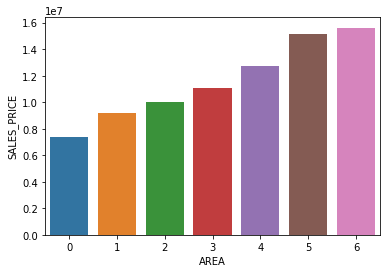

In [20]:
area_val={'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6} #performing label encoding
df['AREA']=df['AREA'].map(area_val)
areavsale=df[['AREA','SALES_PRICE']].groupby('AREA').mean().reset_index().sort_values('SALES_PRICE')
areavsale
sns.barplot(x='AREA',y='SALES_PRICE',data=areavsale) #ploting AREA and SALES_PRICE

### SALE_COND VS SALES_PRICE

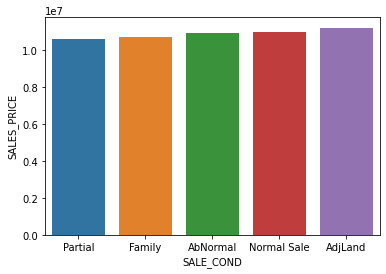

In [21]:
scondvsale=df[['SALE_COND','SALES_PRICE']].groupby('SALE_COND').mean().reset_index().sort_values('SALES_PRICE')
scondvsale
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=scondvsale)#ploting graph between sale condition and average sales price
df.drop('SALE_COND',axis=1,inplace=True) #since it the sale_cond is not releated with sales price we drop the column 

### PARK_FACIL VS SALES_PRICE

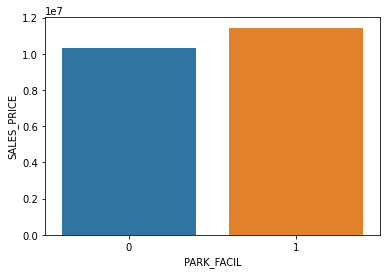

In [22]:
park_val={'No':0,'Yes':1} #performing label encoding for PARK_FACIL yes=1 and no=0
df['PARK_FACIL']=df['PARK_FACIL'].map(park_val)
parkvsale=df[['PARK_FACIL','SALES_PRICE']].groupby('PARK_FACIL').mean().reset_index().sort_values('SALES_PRICE')
parkvsale
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=parkvsale)

### BUILD_TYPE VS SALES_PRICE


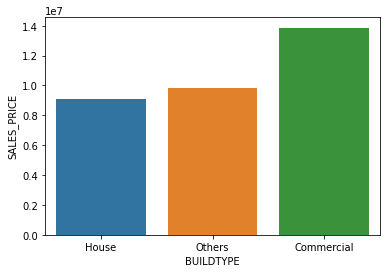

In [23]:
btypevsale=df[['BUILDTYPE','SALES_PRICE']].groupby('BUILDTYPE').mean().reset_index().sort_values('SALES_PRICE')
btypevsale
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=btypevsale)

In [24]:
df=pd.get_dummies(df,columns=['BUILDTYPE'])
df.drop(columns=['BUILDTYPE_Others'],axis=1,inplace=True) #perfoming one hot encoding to prepare for better predection

### UTILITY_AVIL VS SALES_PRICE

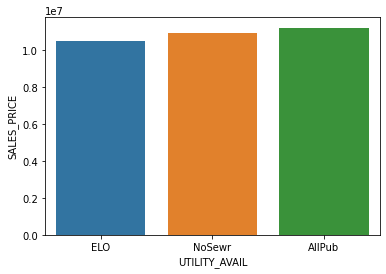

In [25]:
utilvsale=df[['UTILITY_AVAIL','SALES_PRICE']].groupby('UTILITY_AVAIL').mean().reset_index().sort_values('SALES_PRICE')
utilvsale
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=utilvsale) #plotting between Utility_Avil adn Sales_Price 
                                                              #UTILITY_AVIL is linearly related with SALES_PRICE

In [26]:
util_val={'ELO':0,'NoSewr':1,'AllPub':2}
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].map(util_val) #performing label encoding to fit into Regression Model
util_val

{'ELO': 0, 'NoSewr': 1, 'AllPub': 2}

### STREET VS SALES_PRICE

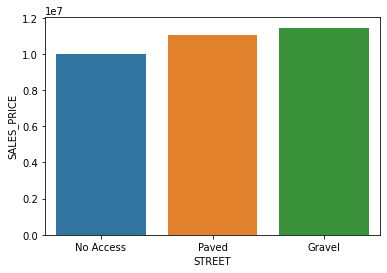

In [27]:
streetvsale=df[['STREET','SALES_PRICE']].groupby('STREET').mean().reset_index().sort_values('SALES_PRICE')
streetvsale
sns.barplot(x='STREET',y='SALES_PRICE',data=streetvsale) #plotting between the street and sales_price
                                                         #Street is linearly releated with sales_price

In [28]:
street_val={'No Access':0,'Paved':1,'Gravel':2} #performing label encoding
df['STREET']=df['STREET'].map(street_val)

### MZZONE VS SALES_PRICE

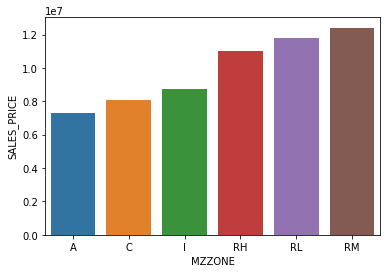

In [29]:
mzzonevsale=df[['MZZONE','SALES_PRICE']].groupby('MZZONE').mean().reset_index().sort_values('SALES_PRICE')
mzzonevsale
sns.barplot(x='MZZONE',y='SALES_PRICE',data=mzzonevsale)

In [30]:
mzzone_val={'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6} #performing label encoding
df['MZZONE']=df['MZZONE'].map(mzzone_val)

### DROPPING REG_FEE AND COMMIS

In [31]:
df.drop(columns=['REG_FEE','COMMIS','PRT_ID'],axis=1,inplace=True) #dropping reg fee and commis hence it cant be predicted and used
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AREA                  7109 non-null   int64  
 1   INT_SQFT              7109 non-null   int64  
 2   DATE_SALE             7109 non-null   int64  
 3   DIST_MAINROAD         7109 non-null   int64  
 4   N_BEDROOM             7109 non-null   int64  
 5   N_BATHROOM            7109 non-null   int64  
 6   N_ROOM                7109 non-null   int64  
 7   PARK_FACIL            7109 non-null   int64  
 8   DATE_BUILD            7109 non-null   int64  
 9   UTILITY_AVAIL         7109 non-null   int64  
 10  STREET                7109 non-null   int64  
 11  MZZONE                7109 non-null   int64  
 12  QS_ROOMS              7109 non-null   float64
 13  QS_BATHROOM           7109 non-null   float64
 14  QS_BEDROOM            7109 non-null   float64
 15  QS_OVERALL           

### N_BEDROOM VS SALES_PRICE

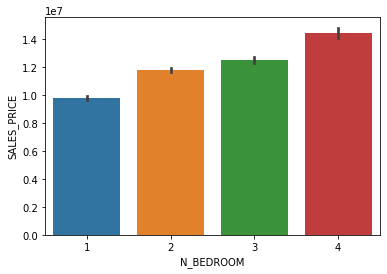

In [32]:
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df)

As number of room increasing the sale price is increasing

### N_BATHROOM VS SALES_PRICE

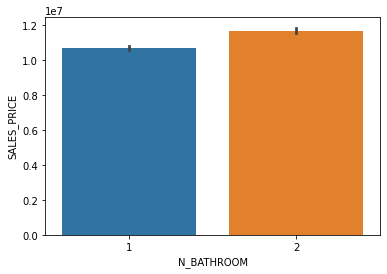

In [33]:
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=df)

There is a linear releationship between number of bathroom and sales price 

### N_ROOM VS SALES_PRICE

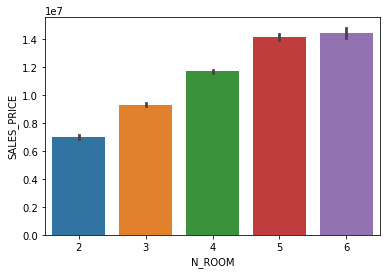

In [34]:
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=df)

As number of room increasing the sale price is also increasing

### INT_SQT VS SALES_PRICE

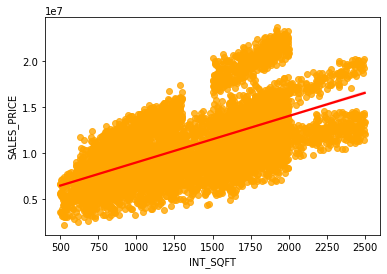

In [35]:
sns.regplot(x='INT_SQFT',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'red'}) #checking the linear releationship

There is linear releationship between INT_SQT and SALES_PRICE

### DIST_MAINROAD VS SALES_PRICE 

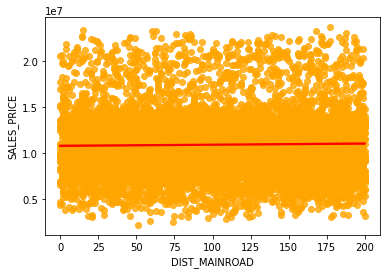

In [36]:
sns.regplot(x='DIST_MAINROAD',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'red'})

There is no linear releationship between DIST_MAINROAD and SALES_PRICE

### QS_BEDROOMS VS SALES_PRICE

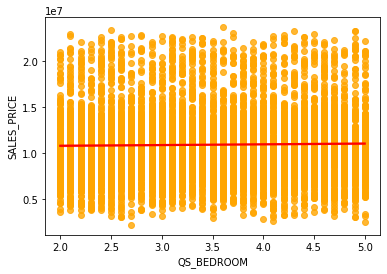

In [37]:
sns.regplot(x='QS_BEDROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'red'})

There is no linear releationship between QS_BEDROOM and SALES_PRICE

### QS_BATHROOM vs SALES_PRICE

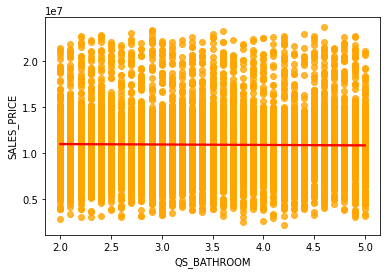

In [38]:
sns.regplot(x='QS_BATHROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'red'})

There is no linear releationship between QS_BATHROOM vs BED_ROOM

### QS_OVERALL VS SALES_PRICE 

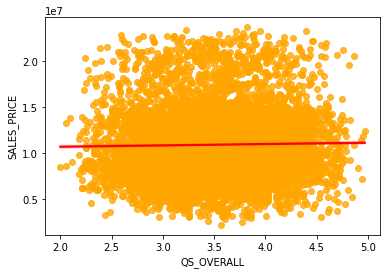

In [39]:
sns.regplot(x='QS_OVERALL',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'red'})

There is no linear releationship between QS_OVERALL and SALE_PRICE

### AGE VS SALES_PRICE

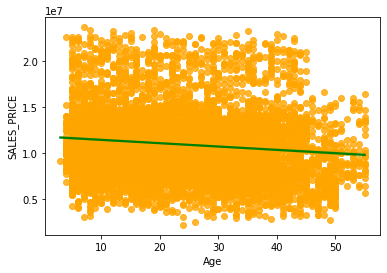

In [40]:
sns.regplot(x='Age',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

There is a negative linear releationship between Age and Sales_Price

### Dropping the columns which is not necessary

From the above analysis we drop the columns which has no releationship

In [41]:
df.drop(columns=['QS_OVERALL','DIST_MAINROAD','QS_ROOMS','QS_BEDROOM','QS_BATHROOM','DATE_BUILD','DATE_SALE'],axis=1,inplace=True)
df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,Age,BUILDTYPE_Commercial,BUILDTYPE_House
0,0,1004,1,1,3,1,2,1,0,7600000,44,1,0
1,5,1986,2,1,5,0,2,2,4,21717770,11,1,0
2,1,909,1,1,3,1,0,2,5,13159200,20,1,0
3,3,1855,3,2,5,0,1,1,2,9630290,22,0,0
4,0,1226,1,1,3,1,2,2,1,7406250,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,1,1,2,0,0,0,6,5353000,49,0,0
7105,3,1897,3,2,5,1,1,0,4,10818480,9,0,0
7106,3,1614,2,1,4,0,1,2,2,8351410,28,0,1
7107,0,787,1,1,2,1,0,1,5,8507000,32,1,0


In [42]:
df.dtypes

AREA                    int64
INT_SQFT                int64
N_BEDROOM               int64
N_BATHROOM              int64
N_ROOM                  int64
PARK_FACIL              int64
UTILITY_AVAIL           int64
STREET                  int64
MZZONE                  int64
SALES_PRICE             int64
Age                     int64
BUILDTYPE_Commercial    uint8
BUILDTYPE_House         uint8
dtype: object

In [43]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,Age,BUILDTYPE_Commercial,BUILDTYPE_House
0,0,1004,1,1,3,1,2,1,0,7600000,44,1,0
1,5,1986,2,1,5,0,2,2,4,21717770,11,1,0
2,1,909,1,1,3,1,0,2,5,13159200,20,1,0
3,3,1855,3,2,5,0,1,1,2,9630290,22,0,0
4,0,1226,1,1,3,1,2,2,1,7406250,30,0,0


# Linear Regression Model

In [44]:
X = df.drop('SALES_PRICE',axis=1)
Y = df['SALES_PRICE'].values

#### *Splitting*

In [45]:
from sklearn.model_selection import train_test_split
X=df[['INT_SQFT','N_ROOM','BUILDTYPE_Commercial','BUILDTYPE_House','AREA','N_BEDROOM','PARK_FACIL','STREET','MZZONE','Age','UTILITY_AVAIL']]
y=df['SALES_PRICE']
#X_val=df[['AGE']].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

#### *Scaling*

In [46]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

#### *Model Fitting* 

In [47]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train_scaled, y_train)

LinearRegression()

#### *Predecting Values*

In [48]:
y_pred = regressor.predict(X_test_scaled)
y_pred


array([ 7815467.84456131, 17763369.61483245, 17364006.35269058, ...,
        8586233.85364293, 15824650.76052151, 12542063.58973275])

#### *Evaluation Metric-R2 value*

In [49]:
from sklearn import metrics 
from sklearn.metrics import r2_score
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9188973680428534


# KNN - K Nearest Neighbours algorithm

#### *Hyper parameter Tunning, Fitting the model* 

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsRegressor(i)
  knn.fit(X_train_scaled,y_train) 
  print("K value  : " , i, " train score : ", knn.score(X_train_scaled,y_train) , " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))


K value  :  1  train score :  0.9999965508294676  score :  0.9321005514405061
K value  :  2  train score :  0.9837697101218562  score :  0.9452796356523869
K value  :  3  train score :  0.9768049876170515  score :  0.9489800981144262
K value  :  4  train score :  0.9727244971661974  score :  0.9493194186939713
K value  :  5  train score :  0.9691712496925571  score :  0.9490891608576788
K value  :  6  train score :  0.9663747549892854  score :  0.9492725334227557
K value  :  7  train score :  0.9640663007539741  score :  0.9488818687734503
K value  :  8  train score :  0.9622575935702888  score :  0.9485155814413432
K value  :  9  train score :  0.9607619464940766  score :  0.9476051554130956
K value  :  10  train score :  0.9593171935810542  score :  0.9465038713153587
K value  :  20  train score :  0.9461265270518864  score :  0.9366004641493145
K value  :  50  train score :  0.9199290284969615  score :  0.9117751912993087


#### *Scoring the model-R2 Score with best hyperparameter*

In [51]:
knn = KNeighborsRegressor(3)
knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled,y_test)

0.9534902392227766

#Decision Tree Regressor Algorithm

#### *Fitting the model*

In [52]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 4)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=4)

#### *Predicted values*

In [53]:
y_pred = dt.predict(X_test_scaled)
y_pred

array([ 7750366.70233463, 18687915.58139535, 18687915.58139535, ...,
        9343842.8679078 , 13820066.58379374, 13709014.49324324])

#### *Evaluation Metric-R2 Score*

In [54]:
print('R2- SCORE:', r2_score(y_test,y_pred))

R2- SCORE: 0.8847859023562256


# Random Forest Regressor Algorithm

#### *Fitting the model*

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators= 100, max_depth = 4, max_features='sqrt')
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

#### *Predecting Values*

In [56]:
y_pred = rf.predict(X_test_scaled) 
y_pred

array([ 8711417.31375318, 17458321.94820257, 17376860.62337923, ...,
        8830643.502669  , 14947588.96425088, 12743728.42472797])

#### *Evaluation Metric-R2 Score*

In [57]:
print('R2- SCORE:', r2_score(y_test,y_pred))

R2- SCORE: 0.8883119532268173


#XG Boost Algorithm

#### *Tuning Based on the learning rate, Fitting the model*

In [58]:
import xgboost as xgb
from xgboost import XGBRegressor
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train_scaled,y_train)
  model.score(X_test_scaled, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train_scaled,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train_scaled, y_train, cv=10)))


Learning rate :  0.01  Train score :  -0.38872917558770315  Cross-Val score :  -0.39632347427187264
Learning rate :  0.02  Train score :  0.7454267166743702  Cross-Val score :  0.7421262596353956
Learning rate :  0.03  Train score :  0.9247767671922245  Cross-Val score :  0.9220564029401924
Learning rate :  0.04  Train score :  0.9621211075081356  Cross-Val score :  0.9599117623793203
Learning rate :  0.05  Train score :  0.9741586825352985  Cross-Val score :  0.9721163601531861
Learning rate :  0.06  Train score :  0.980238525597634  Cross-Val score :  0.9780913055584026
Learning rate :  0.07  Train score :  0.984681017377075  Cross-Val score :  0.9825028715745752
Learning rate :  0.08  Train score :  0.9871313583076313  Cross-Val score :  0.9855660651782617
Learning rate :  0.09  Train score :  0.9896245393300652  Cross-Val score :  0.9874790679987372
Learning rate :  0.1  Train score :  0.9904665581969113  Cross-Val score :  0.9889546533412592
Learning rate :  0.11  Train score :  0

#### *Calcuating Score- R2 Score*

In [59]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100)
model.fit(X_train_scaled,y_train)
model.score(X_test_scaled, y_test)

[10:14:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9934713393590254

#### *Feature Importances*

In [60]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Other'],selector.support_))

[('AREA', False),
 ('INT_SQFT', True),
 ('N_BEDROOM', True),
 ('N_BATHROOM', False),
 ('N_ROOM', True),
 ('PARK_FACIL', False),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', False),
 ('AGE', False),
 ('BUILDTYPE_Commercial', False)]

In [1]:
!pip install scikit-learn==0.24.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Other'],sfs.get_support())))

[('AREA', False), ('INT_SQFT', False), ('N_BEDROOM', True), ('N_BATHROOM', False), ('N_ROOM', True), ('PARK_FACIL', False), ('UTILITY_AVAIL', False), ('STREET', False), ('MZZONE', False), ('AGE', False), ('BUILDTYPE_Commercial', False)]


Text(0.5, 1.0, 'Feature Importance')

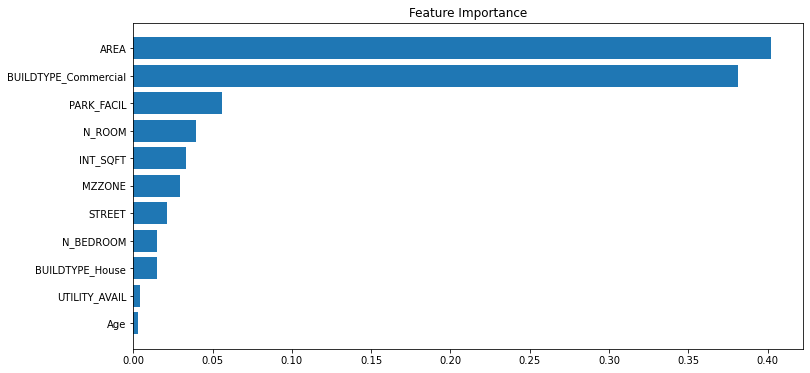

In [62]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')



*   The AREA and the BUILDTYPE_Commercial are the important features.

**R2 Scores of all models :**

*   Linear Regression   :0.92
*   K Nearest Neighbours:0.95

*   Decision Tree       :0.88
*   Random Forest       :0.88



*   XG Boost:0.99

**Conclusion:**The best Machine Learning Algorithm for Chennai House Price Predection is **XG Boost** Model.












